<a href="https://colab.research.google.com/github/CharlotteHoyt/KWK-Goldman-Sachs-ML-Titanic-Survival-Data/blob/main/Charlotte_Hoyt_KWK_Titanic_Survival_Data_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KWK Machine Learning Challenge 2025
##Titanic Survival Data Notebook

Make a copy of this notebook and follow along with the guided curriculum lessons!

Portions of code for you to complete are marked with a #TODO comment.

### Mounting files from Google Colab

In [3]:
# For more information on this, see this link: https://colab.research.google.com/notebooks/io.ipynb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Basic import statements
import pandas as pd
from scipy import stats

# Loading Data into a Dataframe
First, we load the data from the CSV file into a pandas dataframe. Read more about pandas dataframes [here](https://pandas.pydata.org/docs/user_guide/dsintro.html).

After we load the data using the `read_csv` function, we preview the dataframe using `df.head()` and visually inspect the results to ensure it was loaded as we expected.

In [5]:
# TODO: Replace the path below with the path to the file on your own Google Drive.
df = pd.read_csv("/content/drive/My Drive/KWK_ML/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#This should have some output if your dataframe was loaded correctly.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#STAT1.1.1 - Data Types

Below is a list of the columns in the Titanic dataset.
Record what kind of data each represents.
Use the following categories to classify each variable:

* Continuous quantitative data
* Discrete quantitative data
* Nominal qualitative data
* Ordinal qualitative data
* Other common types (select which)

| Column Name   | Description                          | Data Type                      | Explanation                                                                          |
| ------------- | ------------------------------------ | ------------------------------ | ------------------------------------------------------------------------------------ |
| `PassengerId` | Unique identifier for each passenger | **Nominal Qualitative** | Numerical data with no natural order. |
| `Survived`    | Survival status (0 = No, 1 = Yes)    | **Binary/Boolean** | Only has two possible values. |
| `Pclass`      | Ticket class (1st, 2nd, 3rd)         | **Ordinal Qualitative** | Categorical data with a meaningful order. |
| `Name`        | Passenger’s full name                |  **Text/String** | Names are a type of free-form text that can't be categorized. |
| `Sex`         | Gender of passenger                  | **Nominal Qualitaitve** | A type of categorical data with no natural order. |
| `Age`         | Age in years                         |  **Continuous Quanitative** | Any numerical value, including possibly fractions/decimal values. |
| `SibSp`       | Number of siblings/spouses aboard    |  **Discrete Quantitative** | Whole numbers, can't have a partial count of siblings/spouses. |                                                          
| `Parch`       | Number of parents/children aboard    |  **Discrete Quantitative** | Similarly, counted using whole numbers. |
| `Ticket`      | Ticket number                        | **Nominal Qualitative** | An ID, numbers but not quantitative. |
| `Fare`        | Ticket price                         | **Continuous Qualitative** | A ticket price could have a fraction/decimal.  |
| `Cabin`       | Cabin number                         | **Nominal Qualitative** | An identifier, includes numbers but is not quantitative. |
| `Embarked`    | Port of embarkation (C, Q, S)        |  **Nominal Qualitiative** | Categories representing locations (unordered). |


#STAT1.1.2 - Calculating Measures of Central Tendency
Let's start by finding the measures of central tendency of each numeric variable in the Titanic dataset.

By calculating the mean, median, and mode for columns like `Age`, `SibSp`, `Parch`, `Fare`, and `Pclass`, we can get a sense of what was typical for passengers on board: their average age, common ticket class, and usual family size.
These measures help summarize large amounts of data into a few meaningful numbers that tell the story of who was on the ship.

In [7]:
# Select numeric columns to analyze
# We’ll focus on three continuous or discrete quantitative variables
cols = ["Age", "SibSp", "Parch", "Fare", "Pclass"]

# Loop through each column and compute measures of spread
for col in cols:
    print(f"\n--- {col.upper()} ---")

    # Calculate Mean
    #TODO:  calculate the mean age and assign to the variable `mean_age`
    mean_age = df[col].mean();
    print(f"Mean: {mean_age}")

    # Calculate Median
    #TODO:  calculate the median age and assign to the variable `median_age`
    median_age = df[col].median();
    print(f"Median: {median_age}")

    # Calculate Mode
    # This example is a bit more complicated, so it's done for you below
    mode_result = stats.mode(df[col], keepdims=True)
    mode_age = mode_result.mode[0]
    count_mode = mode_result.count[0]
    print(f"Mode: {mode_age} (appears {count_mode} times)")


--- AGE ---
Mean: 29.69911764705882
Median: 28.0
Mode: nan (appears 177 times)

--- SIBSP ---
Mean: 0.5230078563411896
Median: 0.0
Mode: 0 (appears 608 times)

--- PARCH ---
Mean: 0.38159371492704824
Median: 0.0
Mode: 0 (appears 678 times)

--- FARE ---
Mean: 32.204207968574636
Median: 14.4542
Mode: 8.05 (appears 43 times)

--- PCLASS ---
Mean: 2.308641975308642
Median: 3.0
Mode: 3 (appears 491 times)


### 💭 Reflection: Interpreting Correlations

**What do these averages tell us about who was on board the Titanic?**

The average age of passengers on the Titanic was in the upper 20s. Additionally, the mean ("average") ticket price was around 32 pounds. However, the median ticket pice is much lower, at 14 pounds, with the most common (mode) ticket price being 8.05 pounds. This means that many passengers were young and not especially wealthy.

**What do the results for SibSp and Parch suggest about how people traveled?**

The central tendencies are all very close to 0, meaning many people were travelling alone.

#STAT1.1.3 - Calculating Spread and Variation

Now that we know what was typical for passengers aboard the Titanic, let's look at how much variation there was between them.

By calculating the **range**, **interquartile range** (IQR), and **standard deviation** for features like `Age`, `Fare`, and `Pclass`, we can see how widely passengers differed in age, ticket price, and social class.

In [8]:
# Select numeric columns to analyze
# We’ll focus on three continuous or discrete quantitative variables
cols = ["Age", "SibSp", "Parch", "Fare", "Pclass"]

# Loop through each column and compute measures of spread
for col in cols:
    print(f"\n--- {col.upper()} ---")

    # TODO - calculate and print min, max, range, IQR, and standard deviation for each column
    min_age = df[col].min()
    print(f"Min: {min_age}")

    max_age = df[col].max()
    print(f"Max: {max_age}")

    range = max_age - min_age
    print(f"Range: {range}")

    quartile_1 = df[col].quantile(0.25)
    quartile_3 = df[col].quantile(0.75)
    interquartile_range = quartile_3 - quartile_1
    print(f"IQR: {interquartile_range}")

    standard_deviation = df[col].std()
    print(f"Standard Deviation: {standard_deviation}")


--- AGE ---
Min: 0.42
Max: 80.0
Range: 79.58
IQR: 17.875
Standard Deviation: 14.526497332334044

--- SIBSP ---
Min: 0
Max: 8
Range: 8
IQR: 1.0
Standard Deviation: 1.1027434322934275

--- PARCH ---
Min: 0
Max: 6
Range: 6
IQR: 0.0
Standard Deviation: 0.8060572211299559

--- FARE ---
Min: 0.0
Max: 512.3292
Range: 512.3292
IQR: 23.0896
Standard Deviation: 49.693428597180905

--- PCLASS ---
Min: 1
Max: 3
Range: 2
IQR: 1.0
Standard Deviation: 0.8360712409770513


Now that we understand how measures like range, IQR, and standard deviation describe variation, let's see what that spread looks like visually. Box plots are a simple way to compare how much values differ within and across variables.

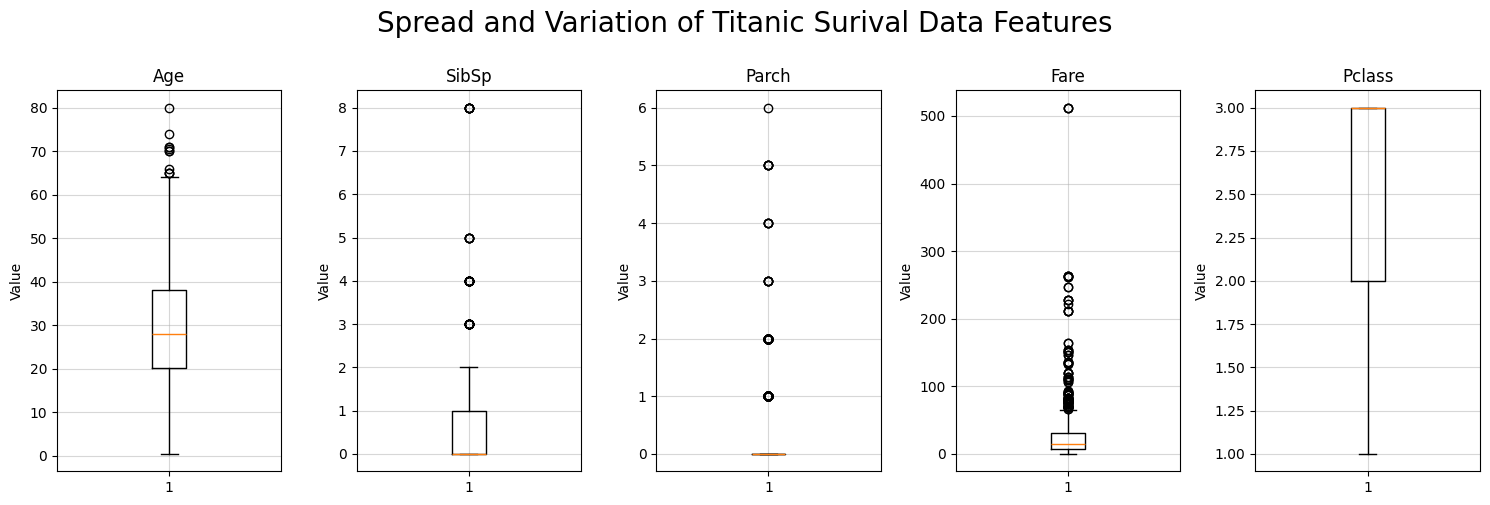

In [9]:
import matplotlib.pyplot as plt

# Define numeric columns to visualize
cols = ["Age", "SibSp", "Parch", "Fare", "Pclass"]

#TODO - create a box plot for each feature
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))

for i, col in enumerate(cols):
  axes[i].set_title(col)
  axes[i].set_ylabel("Value")
  axes[i].boxplot(df[col].dropna(), vert = True)
  axes[i].grid(True, linestyle = "-", alpha = 0.5)

plt.suptitle("Spread and Variation of Titanic Surival Data Features", fontsize = 20, y = 1)
plt.tight_layout()
plt.show()


A box plot shows how data is distributed at a glance. The box itself represents the middle 50% of the data (from the 25th percentile (Q1) to the 75th percentile (Q3)) with the line inside marking the median. The "whiskers" extend to show the overall range of typical values, and any points beyond them are outliers. A taller box means more variability, while a shorter one means the data is more consistent.

## 💭 Reflection: Variation and Spread

**Which variable shows the most variation, and what does that tell us about conditions aboard the Titanic?**

The variable that shows the most variation is the fare (ticket price). This indicates that Titanic passengers came from a variety of different financial situations, with some paying huge amounts and some paying very little.

**Which variables show the least variation, and what might that suggest about passenger demographics?**

The variable that shows the least variation is the Pclass (ticket class). The Pclass can only be either 1st, 2nd, or 3rd, and most passengers are grouped around the 3rd class. This means that the majority of passengers were in the 3rd class and only a few wealthy passengers were in the 1st class. This suggests that a lot of Titanic passengers were working class. The Sibsp (number of siblings and spouses) and Parch (number of parents/children) are also low, meaning most people travelled alone.

# STAT1.1.4 - Correlation and Scatter Plots

Next, let's explore how different numeric features in the Titanic dataset relate to one another.
We'll calculate a correlation matrix using the Pearson correlation coefficient.

In [10]:

# Select numeric columns to explore
cols = ["Survived", "Age", "SibSp", "Fare", "Parch", "Pclass"]

# Display the correlation matrix
# TODO - display the correlation matrix
df[cols].corr()

,Survived,Age,SibSp,Fare,Parch,Pclass
Survived,1.000000,-0.077221,-0.035322,0.257307,0.081629,-0.338481
Age,-0.077221,1.000000,-0.308247,0.096067,-0.189119,-0.369226
SibSp,-0.035322,-0.308247,1.000000,0.159651,0.414838,0.083081
Fare,0.257307,0.096067,0.159651,1.000000,0.216225,-0.549500
Parch,0.081629,-0.189119,0.414838,0.216225,1.000000,0.018443
Pclass,-0.338481,-0.369226,0.083081,-0.549500,0.018443,1.000000


### 💭 Reflection: Interpreting Correlations

**Fill in the following table to indicate which variables have the strongest correlation with Survival**

|Variable|Direction of Correlation|Magnitude of Correlation|Interpretation|
|:-|:-|:-|:-|
|Age| Negative | 0.08 | Insignificant. |
|Passenger Class| Negative | 0.34 | The higher the passenger classes (1st class) had a better chance of survival than the lower passenger classes (3rd class). |
|Siblings/Spouses Aboard| Negative | 0.04 | Insignificant. |
|Parents/Children Aboard| Positive | 0.08 | Insignificant. |
|Fare| Positive | 0.26 | Passengers who paid higher fares had a better chance of survival. |


**Which variable has the strongest relationship with survival, and what might explain it?**

The variable that has the strongest relationship with survival is Pclass. The correlation is negative (-0.34), meaning passengers in higher classes (1st class, lower in number) were more likely to survive than passengers in lower classes (3rd class, higher in number). This could be due to variabilities such as better access to safety resources and supplies (lifeboats and also staff who may be more likely to help higher class passengers). The cabins for higher class passengers may also have had more space/been larger, and perhaps crowding or cabin location played a role in survival chances.

**How does `Fare` relate to `Survived`, and why does this make sense historically?**

Fare has a positive correlation with surival. The ticket face is likely closely related to the passenger class (Pclass). This once again reinforces that wealthier passengers had a higher chance of survival.

**Why do variables like Age, SibSp, and Parch show such weak correlations with survival?**

Age, SibSp, and Parch all had correlations close to 0. This means that they did not have a linear realationship with survival, or, a passenger's age/who they travelled with had a relatively negligible impact on their chance of survival. This reveals that a person's location in the ship (influenced by their passenger class, which is related to the fare they paid) probably had a larger impact on survival odds compared to measures of who they travelled with or their age.

#STAT1.2.1 - Cleaning data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The result shows that the following columns contain some missing values:


*   **Age**: 177 rows missing (20% of rows)
*   **Embarked**: 2 rows missing (0.2% of rows)
*   **Cabin**: 687 rows missing (77% of rows)

## Handling Missing Age Values

For `Age`, we can assign the median age of the overall dataset to the missing.

Using the median to fill in missing data is usually a safe bet for a few reasons:
*   It is resistant to outliers.
*   It preserves the overall shape of the age distribution.
*   It keeps the dataset usable without biasing survival predictions too much. Dropping 20% of rows would shrink our training data and might remove meaningful patterns; filling them with the median is a low-distortion compromise.

## Handling Missing Embarked Values
The `Embarked` field contains the port that passengers embarked from. Since only 2 rows are missing this information, we could either drop them, or fill them in with the most common port. We'll do the latter.

## Handling Missing Cabin Values
The majority (77%) of these values are missing. It's best to drop this column altogether.



In [22]:
# Fill missing Age values with the median age
# TODO - fill as described
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [23]:
# Fill missing Embarked values with the most common port (mode)
# TODO - fill as described
most_common_port = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_common_port)

In [26]:
# Drop the Cabin column since most values are missing
# TODO - drop as described
df.drop(columns = ['Cabin'], inplace = True)

In [29]:
# re-run df.info() and see that the columns have updated as we expect.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#STAT1.2.2 - Feature Engineering

Use the existing `SibSp` and `Parch` columns in the dataframe to engineer a new column, or feature, called `FamilySize` that captures the total number of family members onboard for a given passenger.

In [30]:
# Add the columns `Parch` and `SibSp` and assign them to a
# new column called `FamilySize`
# TODO - create new column as described
df['FamilySize'] = df['Parch'] + df['SibSp']

# Re-run df.info() to confirm the new column has been created
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [34]:
# Compute the mean, median, mode, range, IQR,
# and standard deviation for the new column

# TODO - do as described above
# (hint, you already did something like this earlier in the notebook!)

mean = df['FamilySize'].mean()
print(f"Mean: {mean}")

median = df['FamilySize'].median()
print(f"Median: {median}")

mode_result = stats.mode(df['FamilySize'], keepdims = True)
mode = mode_result.mode[0]
count_mode = mode_result.count[0]
print(f"Mode: {mode} (appears {count_mode} times)")

min = df['FamilySize'].min()
print(f"Min: {min}")

max = df['FamilySize'].max()
print(f"Max: {max}")

range = max - min
print(f"Range: {range}")

quartile_1 = df['FamilySize'].quantile(0.25)
quartile_3 = df['FamilySize'].quantile(0.75)
interquartile_range = quartile_3 - quartile_1
print(f"IQR: {interquartile_range}")

standard_deviation = df['FamilySize'].std()
print(f"Standard Deviation: {standard_deviation}")

Mean: 0.9046015712682379
Median: 0.0
Mode: 0 (appears 537 times)
Min: 0
Max: 10
Range: 10
IQR: 1.0
Standard Deviation: 1.6134585413550788


# ML1.1.1 - Linear Regression

Train and evaluate a linear regression model that predicts a passenger's Fare depending on their Age.


Coefficent (Slope): 0.36205243579534524
Intercept: 22.01285000657193
Mean Squared Error: 1524.6365182168759
R^2 Score: 0.014729652921299241


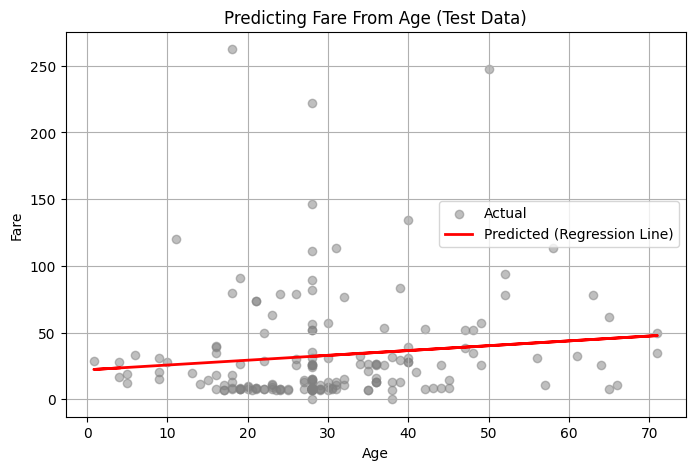

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# TODO: Fill out the below sections, following the steps described.

# --- 1. Define features (X) and target (y) ---
X = df[['Age']]
y = df['Fare']

# --- 2. Split into training and testing sets (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# --- 3. Train the model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 4. Make predictions on test set ---
y_pred = model.predict(X_test)

# --- 5. Evaluate performance ---
# Print coefficient, intercept, MSE, and Rsquared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficent (Slope): {model.coef_[0]}" )
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# --- 6. Visualize results ---
plt.figure(figsize = (8, 5))
plt.scatter(X_test, y_test, color = 'gray', alpha = 0.5, label = 'Actual')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2, label = 'Predicted (Regression Line)')
plt.title('Predicting Fare From Age (Test Data)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.grid(True)
plt.show()


Next, let's add an additional independent variable / input feature: Pclass. Your code will look very similar, but will have two features in the input array rather than just one.

Coefficents: 
  Age: -0.4019086622997041
  Pclass: -36.55219356913219
Intercept: 129.49233313951297
Mean Squared Error: 1051.4749856300004
R^2 Score: 0.3205022235412075


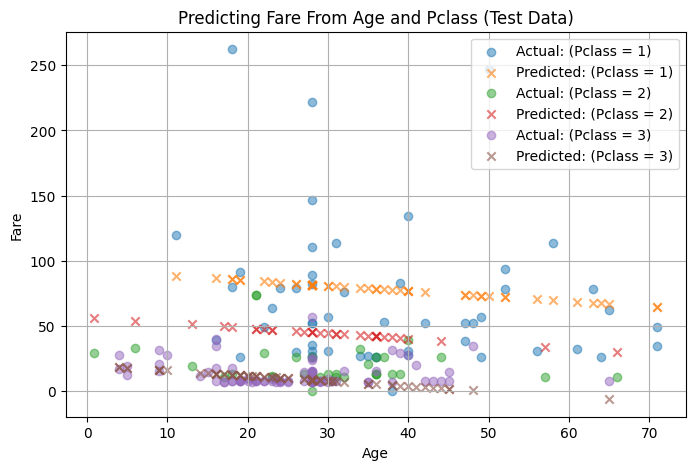

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# TODO: Fill out the below sections, following the steps described.


# --- 1. Define features (X) and target (y) ---
X = df[['Age', 'Pclass']]
y = df['Fare']

# --- 2. Split into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# --- 3. Train model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 4. Predict on test set ---
y_pred = model.predict(X_test)

# --- 5. Evaluate performance ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficents: ")
for name, coef in zip(X_train.columns, model.coef_):
  print(f"  {name}: {coef}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# --- 6. Visualize (optional) ---
# Here, we'll plot how well the model predicts fares for different Ages,
# using one color per Pclass to make the trend easier to see.
plt.figure(figsize = (8, 5))
for pclass in sorted(df['Pclass'].unique()):
  mask = X_test['Pclass'] == pclass
  plt.scatter(X_test.loc[mask, 'Age'], y_test[mask], alpha = 0.5, label = f'Actual: (Pclass = {pclass})')
  plt.scatter(X_test.loc[mask, 'Age'], y_pred[mask], alpha = 0.6, marker = 'x', label = f'Predicted: (Pclass = {pclass})')

plt.title('Predicting Fare From Age and Pclass (Test Data)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.grid(True)
plt.show()


## 💭 Reflection Questions
**Based on your findings, how would you describe the relative correlation of Age and Pclass with Fare? Does one seem to have more potential than the other to predict a given passenger's fare? Why might that be?**

TODO - answer

#ML1.2.1 - Logistic Regression

In this exercise, you'll train a logistic regression model to predict whether a passenger survived the Titanic disaster.

You'll go step-by-step, selecting features, training the model, and evaluating its performance.

##Step 1: Select features and encode categorical data
Logistic regression only works with numeric features.
We'll convert Sex and Embarked into numeric form using [one-hot encoding](https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/).

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# TODO: Fill out the below sections, following the steps described.

# --- 1. Define features and target ---


# --- 2. One-hot encode categorical columns ---


# --- 3. Split into training and testing sets ---



## Step 2: Train and evaluate the logistic regression model
Train the model and view coefficients, then evaluate model performance against test data.

In [21]:
# TODO: Fill out the below sections, following the steps described.

# --- 4. Train the logistic regression model ---


# --- 5. Make predictions on the test set ---


# --- 6. Evaluate model performance ---


# --- 7. Examine feature influence on survival ---


# Optional: Visualization



## 💭 Reflection Questions
**What percentage of passengers in the test dataset does the model correctly classify? (accuracy)**

TODO - answer


**When the model predicts survival, how frequently is it right? (precision)**

TODO - answer


**What percentage of true surviors does the model correctly catch? (recall)**

TODO - answer


**Overall, how well does the model capture the relationship between the independent variables and `Survived`? (F1)**

TODO - answer

